# Weston-Watkins SVM (Support Vector Machine)

Úloha zaměřená na implementaci multiclass SVM metodou SGD.


## 4 třídy 

In [2]:
import numpy as np
import usu

npzfile = np.load('data/data_07_4cl.npz')

data = npzfile['data']
ref = npzfile['ref']

data.shape, ref.shape


((1200, 2), (1200, 1))

## Skóre

### pro i-tý vzorek dat (řádkově):
$$ s_{i} = x_{i} \Theta $$

kde $i$ je i-tý prvek ve vstupních datech $X$

Například pokud $x_i$ má velikosti 1x5 (4 přiznaky + 1 sloupec pro bias) a $\Theta$ má velikost 5x3 (3 je počet tříd), pak $s_n$ má velikost 1x3 (3 je počet tříd).

### Maticově:

$$ S = X \Theta $$

Například pokud má $X$ 100 vzorků a tedy velikost 100x10 (pro 9 příznaků + 1 sloupec pro bias) a $\Theta$ má velikost 10x6 (6 je počet tříd), pak $S$ má velikost 100x6 (6 je počet tříd).

In [3]:
def get_scores(data, theta):
    
    #################################################################
    # ZDE DOPLNIT
    s = ...

    return s #for all elements at ones #1200x4
    #################################################################


In [4]:
thetatest = np.array([[1, 4, 2, 3],[1, 7, 2, 5]])
stest = get_scores(data[[0,400,700,1000],:],thetatest)
stest

array([[  1.517202 ,   1.1936388,   3.034404 ,   1.3014932],
       [  5.1639725,  28.1421644,  10.327945 ,  20.4827671],
       [ -2.7890884, -16.4418961,  -5.5781768, -11.8909602],
       [  0.5638176,   9.6845958,   1.1276352,   6.6443364]])

## Vektor $m$ (margins)

### pro i-tý vzorek dat (řádkově):
$$ m_{ij} = s_{ij} - s_{iy_{i}} + 1 $$

kde $y_{i}$ je index spravné třídy a $s_{iy_{i}}$ je skóre spravné třídy

$ m_{iy_i} = 0 $ protože pro spravnou třídu margin nepočítame

$m$ má stejnou velikost jako $s$

### maticově:

$$ M = S - S[Y] + 1 $$

kde $Y$ je vektor indexů spravných třídy a $S[Y]$ je vektor skóre spravných třídy

$M[Y] = 0$ protože pro spravné třídy margin nepočítame

$M$ má stejnou velikost jako $S$



In [5]:
def get_margins(scores, ref):
    #################################################################
    # ZDE DOPLNIT

    ...
    #################################################################

    return margins
    

In [6]:
mtest = get_margins(stest,ref[[0,400,700,1000],:])
mtest

array([[  0.       ,   0.6764368,   2.517202 ,   0.7842912],
       [-21.9781919,   0.       , -16.8142194,  -6.6593973],
       [  3.7890884,  -9.8637193,   0.       ,  -5.3127834],
       [ -5.0805188,   4.0402594,  -4.5167012,   0.       ]])

## Vektor $\delta$ 


$\delta_{ij} = 0$ pokud $m_{ij} \le 0 => \delta_{iy_{i}}$ = 0

$\delta_{ij} = 1$ pokud $m_{ij} > 0$


## Vektor $g$

$ g_{iy_{i}} = - \sum_{c=0}^{C}{\delta_{ic}} $

$ g_{ij} = \delta_{ij} $



In [7]:
def get_g(margins, ref):
    #################################################################
    # ZDE DOPLNIT

    ...
    #################################################################

    return g


In [8]:
gtest = get_g(mtest,ref[[0,400,700,1000],:])
gtest

array([[-3.,  1.,  1.,  1.],
       [ 0., -0.,  0.,  0.],
       [ 1.,  0., -1.,  0.],
       [ 0.,  1.,  0., -1.]])

## Theta 
$$\Theta_{t+1} = \Theta_t (1-\alpha\lambda) - \alpha    X^T G$$

kde $\alpha$, $\lambda$ jsou hyperparametry, $G$ je matice velikosti počet_vzorků_dat x počet_tříd a $X$ je matice vstupních dat, rozšířená o jeden sloupec pro bias(velikost: počet_elementů x počet_příznaků + 1).


In [9]:
def theta_SGD_test(data, ref, iterations=10, alpha=0.0001, lmbd=1):
    #################################################################
    # ZDE DOPLNIT s vyuzitim vsech vyse pripravenech funkci
    
    # rozsirte data o sloupec pro biasy

    ...
    
    for it in range(iterations):
       ...
    #################################################################

    return theta


In [10]:
theta = theta_SGD_test(data,ref)
theta


array([[-0.0188894 ,  0.00949374,  0.02318749, -0.01379183],
       [ 0.3606007 ,  0.3403239 , -0.34903845, -0.35188616],
       [-0.33467091,  0.3520069 , -0.36785779,  0.35052179]])

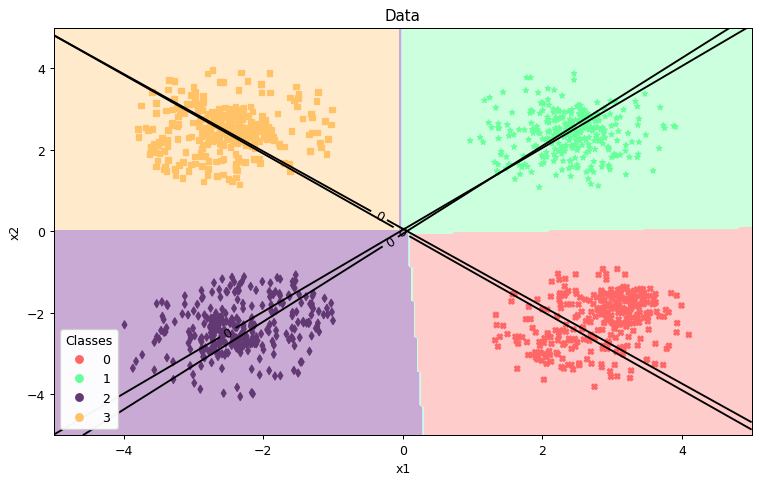

In [11]:
usu.drawSVM(data,ref,theta)

Rozhodněte o přiřazení ke třídám pro body [1, 4] a [3, -2]


In [12]:
#################################################################
point = np.array([1, 1, 4], ndmin=2)
theta.shape, point.shape
point @ theta #class = green, protoze nejvyssi hodnota je na indexu 1

#################################################################


array([[-0.99697233,  1.75784526, -1.79728211,  1.03640918]])

In [13]:
#################################################################
point = np.array([1,3,-2], ndmin=2)
theta.shape, point.shape
point @ theta #class= red, protoze nejvyssi hodnota je na indexu 0

array([[ 1.73225453,  0.32645164, -0.28821229, -1.77049388]])

## 5 Tříd 

In [14]:

npzfile = np.load('data/data_07_5cl.npz')


data = npzfile['data']
ref = npzfile['ref']

theta = theta_SGD_test(data,ref)
theta



array([[-0.21349695, -0.1823137 , -0.16471712, -0.21189753,  0.77242529],
       [ 0.45306903,  0.45460658, -0.45342319, -0.46299569,  0.00874327],
       [-0.42194557,  0.44380034, -0.46014583,  0.42776277,  0.01052829]])

d:\OneDrive\vyuka\USU\usu-podklady.repo\usu.py:230: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(u, v, z.T, [0], colors='k')


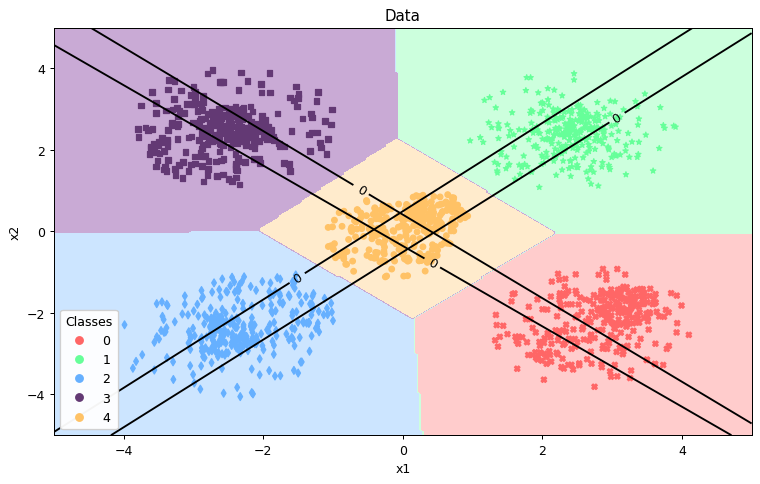

In [15]:
usu.drawSVM(data,ref,theta)